In [7]:
#importing
from pylab import *

import csv
import urllib2

import matplotlib.tri as Tri
import datetime
import time
import sys
%matplotlib inline

In [123]:
#getting the url for the files
def getURL (ensemble):
    url_base='http://opendap.renci.org:1935/thredds/fileServer/Experiments/Isabel_ex1/tracks/Isabel_ex1_12km_n%02d.trk'
    url=url_base % ensemble
    return url

#Getting the files
def getFile (url):
    response = urllib2.urlopen(url)
    return response

#reading out the info
def getInfo (files):
    film = np.zeros((721,10))
    x=0
    for line in files:
        if line.startswith('#'):
            continue
        lists = line.split()
        arrays = np.asarray(lists, dtype = np.float)
        film[x,:] = arrays
        x=x+1
    return film

In [128]:
totalens = 20
size = (5,721,totalens)
multi = np.zeros(size)
ens = 1

for ens in range(1,21):
    url = getURL(ens)
    files = getFile(url)
    info = getInfo(files)
    multi[0,:,ens-1] = info[:,5] #lon
    multi[1,:,ens-1] = info[:,6] #lat
    multi[2,:,ens-1] = info[:,7] #Pmin(mb)
    multi[3,:,ens-1] = info[:,8] #Rmax (km)
    multi[4,:,ens-1] = info[:,9] #Vmax (m/s)

[[[  -55.7    -55.8    -54.1  ...,   -56.1    -56.     -56.7 ]
  [  -55.7    -55.93   -54.2  ...,   -56.27   -56.07   -56.9 ]
  [  -55.88   -55.92   -54.2  ...,   -56.32   -56.06   -57.02]
  ..., 
  [  -74.44   -68.62   -68.42 ...,   -74.2    -74.66   -71.2 ]
  [  -74.43   -68.53   -68.5  ...,   -74.27   -74.63   -71.2 ]
  [  -74.4    -68.5    -68.5  ...,   -74.3    -74.6    -71.2 ]]

 [[   21.9     20.7     22.7  ...,    22.      21.6     21.6 ]
  [   21.73    20.6     22.9  ...,    21.93    21.5     21.5 ]
  [   21.72    20.58    22.92 ...,    21.96    21.5     21.5 ]
  ..., 
  [   37.64    33.88    33.58 ...,    35.18    35.84    33.68]
  [   37.67    33.9     33.67 ...,    35.2     35.87    33.7 ]
  [   37.7     33.9     33.7  ...,    35.2     35.9     33.7 ]]

 [[ 1003.29   998.25  1003.4  ...,   998.69  1000.57  1005.16]
  [ 1004.08   998.98  1003.54 ...,   998.98  1001.12  1005.47]
  [ 1004.52   998.96  1003.49 ...,   999.02  1001.52  1005.67]
  ..., 
  [  973.45   958.66   952.

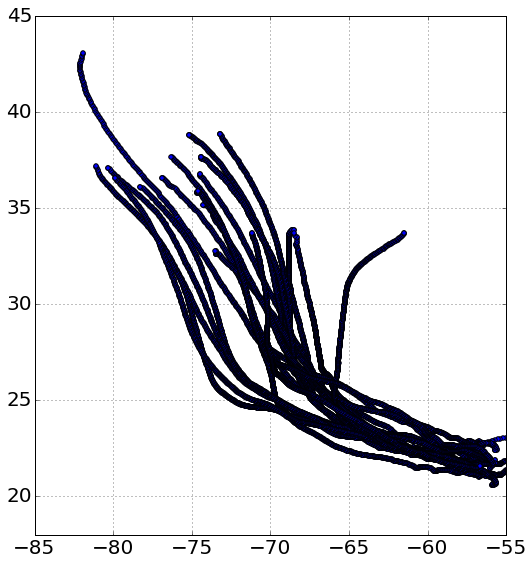

In [148]:
fig = plt.figure(figsize=(18,9), dpi=144)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8]) 
ax.set_aspect(1.0/np.cos(35 * np.pi / 180.0))

plt.grid(True)
plt.xlim((-85,-55))
plt.ylim((18,45))
plt.tick_params(axis='both', which='major', labelsize=20)
for ens in range (0,totalens):
    plt.scatter(multi[0,:,ens],multi[1,:,ens])

In [ ]:
#Setting up the plot

In [ ]:
#Plotting